# Data visualistation with matplotlib


## 1. Import matplotlib modules

In [1]:
import matplotlib

Matplotlib has many different backends, usually its fine to stick to the default. But sometimes it is necessary to change the backend (before importing the plotting module ```pyplot```). The full list of available backends reads:

[u'pgf', u'cairo', u'MacOSX', u'CocoaAgg', u'gdk', u'ps', u'GTKAgg', u'nbAgg', u'GTK', u'Qt5Agg', u'template', u'emf', u'GTK3Cairo', u'GTK3Agg', u'WX', u'Qt4Agg', u'TkAgg', u'agg', u'svg', u'GTKCairo', u'WXAgg', u'WebAgg', u'pdf']

In [2]:
matplotlib.use('MacOSX')

When working from within a jupyter notebook, we can choose *matplotlib* backend with a magic function

In [3]:
%matplotlib --list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'gtk4', 'wx', 'qt4', 'qt5', 'qt6', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


In [ ]:
% matplotlib inline
#% matplotlib notebook

Now, we import ```pyplot``` the main plotting module of *matplotlib*

In [2]:
import matplotlib.pyplot as plt

## 2. The default plot

Let's create some data (normal distribution)

In [3]:
import numpy as np
data = np.random.normal(loc=5., scale=2., size=(10000,))

and plot a simple histogram of our data

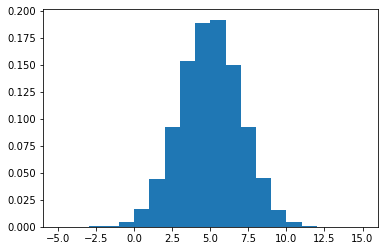

In [5]:
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.hist(data, range=(-5,15), bins=20, density=True)
plt.show()

## 3. Adding more to the plot

First, we are going to fit a Gaussian profile to our function

In [6]:
from scipy.stats import norm
mu,sigma = norm.fit(data)

and plot it on top of our histogram

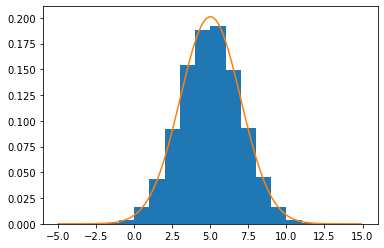

In [8]:
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.hist(data, range=(-5,15), bins=20, density=True)
ax.plot(np.arange(-5,15,0.1),norm.pdf(np.arange(-5,15,0.1),mu,sigma))
plt.show()

let's make a bit easier to read (colors, legends, axis lables, etc..)

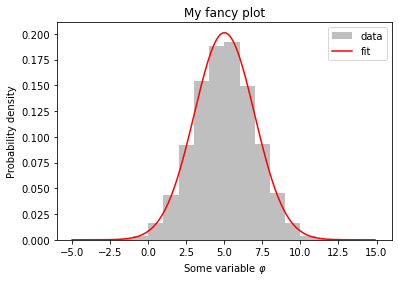

In [9]:
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.set_title('My fancy plot')
ax.hist(data, range=(-5,15), bins=20, density=True, label='data', color='0.75', lw=0.2)
ax.plot(np.arange(-5,15,0.1),norm.pdf(np.arange(-5,15,0.1),mu,sigma), label='fit', color='r')
ax.set_xlabel(r'Some variable $\varphi$')
ax.set_ylabel(r'Probability density')
ax.legend(loc=1)
plt.show()

## 4. More changes to the plot

Our plot looks already quite good, but some of the features don't give any extra information so why not removing them

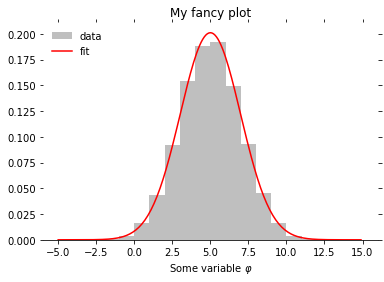

In [12]:
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.set_title('My fancy plot')
ax.hist(data, range=(-5,15), bins=20, density=True, label='data', color='0.75', lw=0.2)
ax.plot(np.arange(-5,15,0.1),norm.pdf(np.arange(-5,15,0.1),mu,sigma), label='fit', color='r')
ax.set_xlabel(r'Some variable $\varphi$')
ax.legend(loc=2, frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', which='both', bottom='on', top='off')
ax.tick_params(axis='y', which='both', left='off', right='off', labelleft='off')
plt.show()

## 5. Saving the plot as a PDF

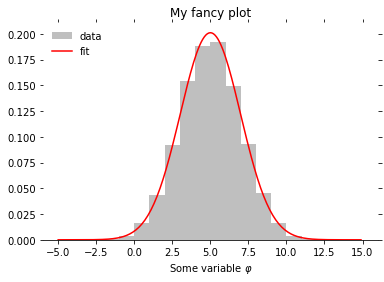

In [13]:
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.set_title('My fancy plot')
ax.hist(data, range=(-5,15), bins=20, density=True, label='data', color='0.75', lw=0.2)
ax.plot(np.arange(-5,15,0.1),norm.pdf(np.arange(-5,15,0.1),mu,sigma), label='fit', color='r')
ax.set_xlabel(r'Some variable $\varphi$')
ax.legend(loc=2, frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', which='both', bottom='on', top='off')
ax.tick_params(axis='y', which='both', left='off', right='off', labelleft='off')
fig.savefig('my_fancy_plot.pdf', format='pdf', bbox_inches='tight')

# Multiimages
https://matplotlib.org/stable/gallery/images_contours_and_fields/multi_image.html#sphx-glr-gallery-images-contours-and-fields-multi-image-py

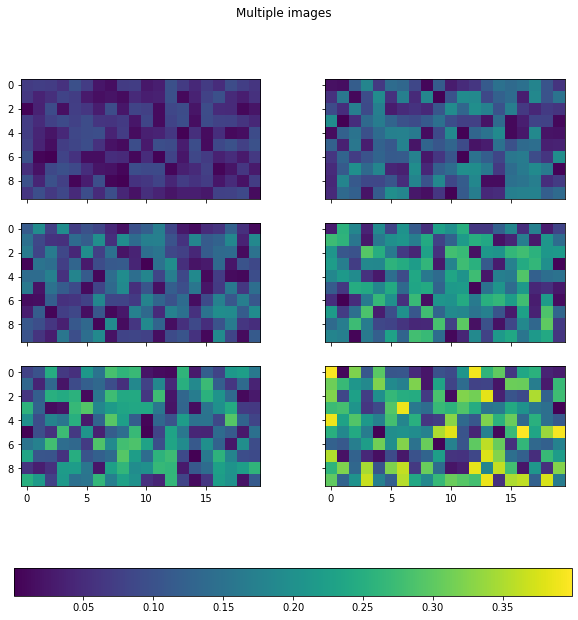

In [20]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import colors

np.random.seed(19680801)
Nr = 3
Nc = 2

fig, axs = plt.subplots(Nr, Nc, figsize=(10, 10))
fig.suptitle('Multiple images')

images = []
for i in range(Nr):
    for j in range(Nc):
        # Generate data with a range that varies from one plot to the next.
        data = ((1 + i + j) / 10) * np.random.rand(10, 20)
        images.append(axs[i, j].imshow(data))
        axs[i, j].label_outer()

# Find the min and max of all colors for use in setting the color scale.
vmin = min(image.get_array().min() for image in images)
vmax = max(image.get_array().max() for image in images)
norm = colors.Normalize(vmin=vmin, vmax=vmax)
for im in images:
    im.set_norm(norm)

fig.colorbar(images[0], ax=axs, orientation='horizontal', fraction=.1)


# Make images respond to changes in the norm of other images (e.g. via the
# "edit axis, curves and images parameters" GUI on Qt), but be careful not to
# recurse infinitely!
def update(changed_image):
    for im in images:
        if (changed_image.get_cmap() != im.get_cmap()
                or changed_image.get_clim() != im.get_clim()):
            im.set_cmap(changed_image.get_cmap())
            im.set_clim(changed_image.get_clim())


for im in images:
    im.callbacks.connect('changed', update)

plt.show()